In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import CSVLogger
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import cv2 as cv


In [ ]:
% pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7920 sha256=e108f4b38aae1f23deddddb54509807303c1e298270eaa319b2d72f1ae6884de
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
#5 Digit classification on MNIST data

#Taking the data into numpy arrays using idx2numpy
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

TrainImages = idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-train-images-idx3-ubyte')### 60k training images each with 784 pixel elements 
TrainLabels = idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-train-labels-idx1-ubyte')#### labels--digits for each training image among 60k
TestImages=idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-test-images-idx3-ubyte')
TestLabels=idx2numpy.convert_from_file('/content/drive/MyDrive/balancedMNIST/emnist-balanced-test-labels-idx1-ubyte')

print(TrainImages.shape)
print(TrainLabels.shape)
print(TestImages.shape)
print(TestLabels.shape)
#Flattening the 28x28 Images to get 784 dimensional vector:



(112800, 28, 28)
(112800,)
(18800, 28, 28)
(18800,)


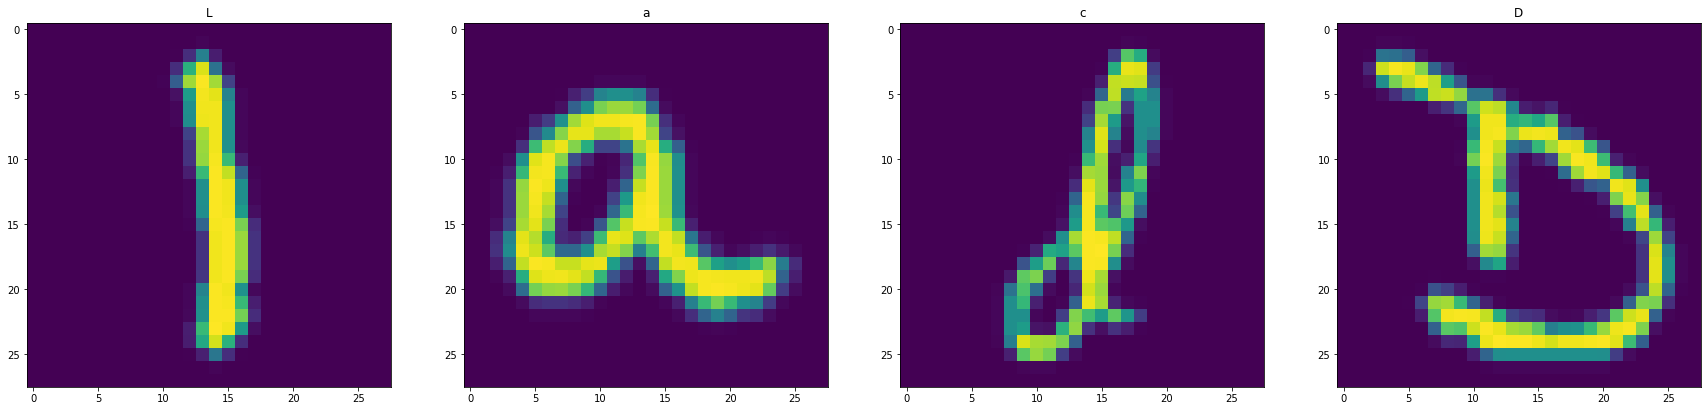

In [ ]:

#Displaying 4 random images from Training Set:
from random import randint
i = randint(0,TrainImages.shape[0])
plt.figure(figsize=(30,8))
for j in range(4):
  i = randint(0,TrainImages.shape[0])
  plt.subplot(1,4,j+1)
  plt.imshow(TrainImages[i])
  plt.title(ReadableLabels(TrainLabels[i]))
plt.show()

In [ ]:
#Flipping and rotating the images in Train/Test set as the images are not in proper orientation.

TrainImages=TrainImages[:,::-1,:]
TrainImages = TrainImages.swapaxes(-2,-1)[...,::-1]
TestImages=TestImages[:,::-1,:]
TestImages = TestImages.swapaxes(-2,-1)[...,::-1]

In [ ]:
#Function to convert numeric labels to readable labels:
def ReadableLabels(arr):
  NumtoChar = {}
  for i in range(10):
    NumtoChar.update({i:str(i)})
  for i in range(10,36):
    NumtoChar.update({i:chr(55+i)})
  for i in range(36,47):
    NumtoChar.update({i:chr(61+i)})  
  return np.vectorize(NumtoChar.get)(arr)


In [ ]:
from random import randint
import numpy as np
i=randint(0,10)
l={}
l.update({i:str(i)})
l.update({i+1:str(i+1)})
l.update({i+2:chr(i+2)})
print(l)
print(np.vectorize(l.get))
print(l)

print(ReadableLabels(i))


{10: '10', 11: '11', 12: '\x0c'}
{10: '10', 11: '11', 12: '\x0c'}
A


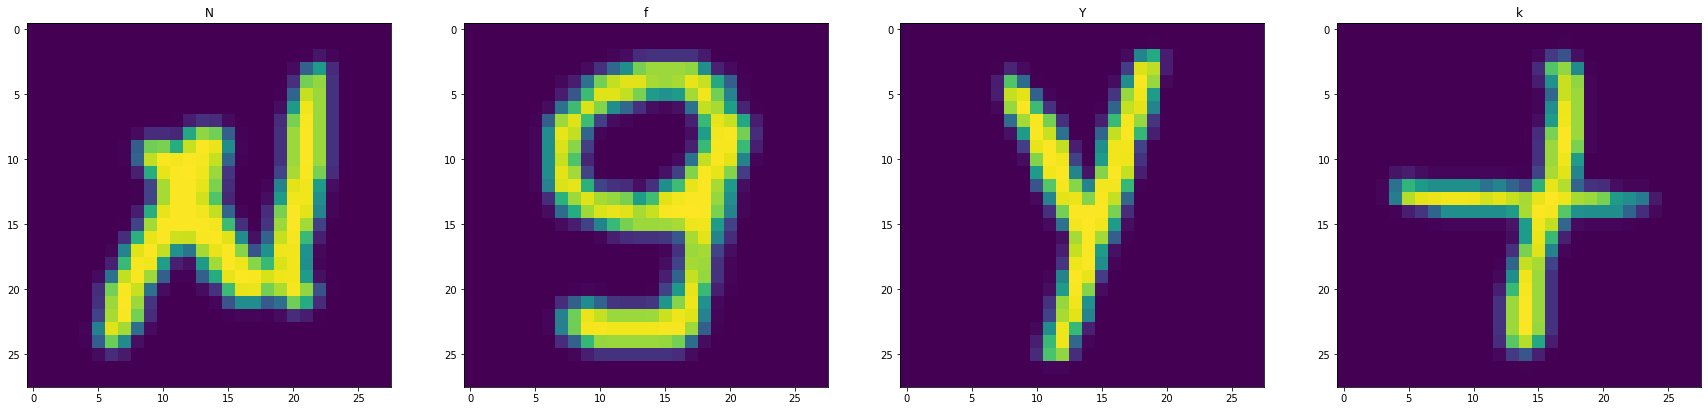

In [ ]:
#Displaying 4 random images from Training Set:
from random import randint
i = randint(0,TrainImages.shape[0])
plt.figure(figsize=(30,8))
for j in range(4):
  i = randint(0,TrainImages.shape[0])
  plt.subplot(1,4,j+1)
  plt.imshow(TrainImages[i])
  plt.title(ReadableLabels(TrainLabels[i]))
plt.show()

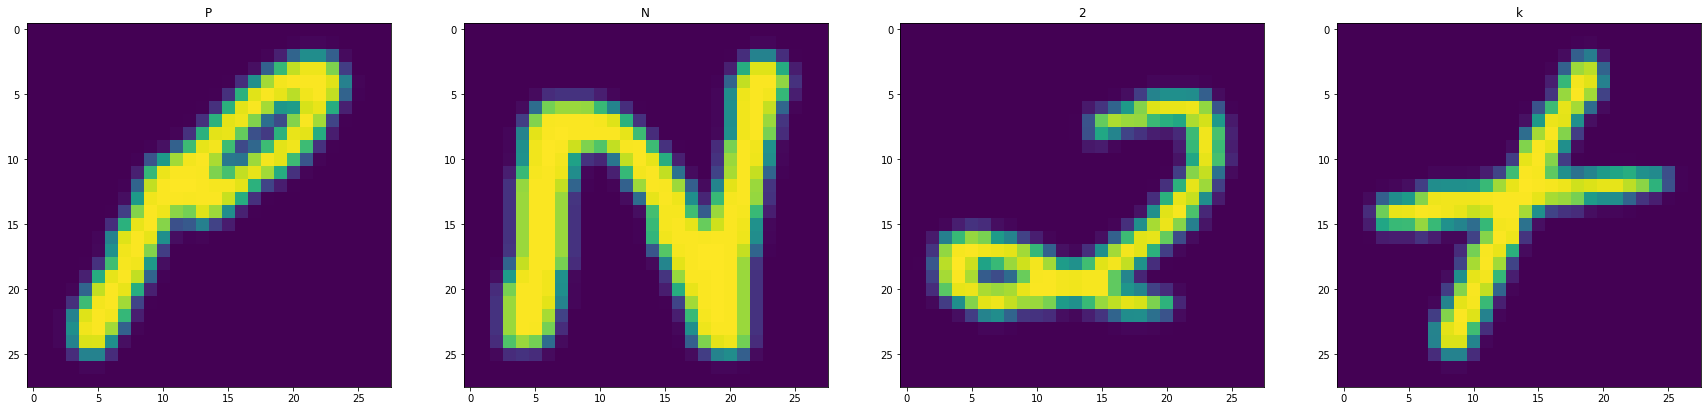

In [ ]:
#Displaying 4 random images from Testing Set:
from random import randint
i = randint(0,TestImages.shape[0])
plt.figure(figsize=(30,8))
for j in range(4):
  i = randint(0,TestImages.shape[0])
  plt.subplot(1,4,j+1)
  plt.imshow(TestImages[i])
  plt.title(ReadableLabels(TestLabels[i]))
plt.show()

In [ ]:
#Flattening the images to get 1-D vectors:
TrainImageSet=TrainImages.reshape(112800,28,28,1)
print(TrainImageSet.shape)
#TrainImageSet=np.hstack((TrainImageSet,TrainLabels.reshape(112800,1))) #Attaching a label column to Image data
#print(TrainImageSet.shape)
x_test=TestImages.reshape(18800,28,28,1)
TestImageSet=np.ravel(TestImages).reshape(18800,-1)
TestImageSet=np.hstack((TestImageSet,TestLabels.reshape(18800,1))) #Attaching a label column to Image data
print(TestImageSet.shape)

(112800, 28, 28, 1)
(18800, 785)


In [ ]:
#Seperating Training set into Images and their labels:
X = TrainImageSet#[:,0:784]       #TrainingImages
print(X.shape)
#Y = TrainImageSet[:,784]        #Training Labels
#print(Y.shape)

(112800, 28, 28, 1)


In [ ]:
# Converting the labels to one hot encoding before training the NN.
encoder = LabelEncoder()
encoder.fit(TrainLabels)
encoded_Y = encoder.transform(TrainLabels)
print(TrainLabels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y.shape)
print(dummy_y)

NameError: ignored

Enter the true label of the test image you want to classify (between 0 to 61) :4


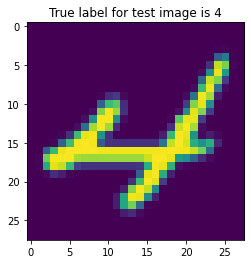

(785,)
(1, 784)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: ignored

In [ ]:
True_label=int(input("Enter the true label of the test image you want to classify (between 0 to 61) :"))

#Selecting a test image having true label = (label entered by user) from the set of 10000 test images
temp_array = TestImageSet
np.random.shuffle(temp_array)
for Image in temp_array:
  if Image[784]==True_label:
    Test_Image=Image
    break
  else:
    continue

#Plotting the selected test image:
Imagetitle="True label for test image is "+ str(ReadableLabels(True_label))
plt.imshow(Test_Image[:-1].reshape(28,28))
plt.title(Imagetitle)
plt.show()

#Classifying the selected test image
print(Test_Image.shape)
Test_Image=Test_Image[0:784].reshape(-1,784)
print(Test_Image.shape)
Test_Image = np.asarray(Test_Image)#.astype('float32')
y_pred = OneHiddenNN_Model.predict_classes(Test_Image)  
print("label predicted by neural network : ",ReadableLabels(y_pred))

In [ ]:
hlayers_range = np.array([1,2])
hlneurons_range = np.array([1000,2000,3000])
files_dir = '/content/drive/MyDrive/balancedMNIST/conv/'
 
# Define baseline model
def OneHiddenNN_Model():
  # create model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))###16-kernels/filters 
  model.add(MaxPooling2D(pool_size=(4, 4),strides=(1,1)))
  model.add(Dropout(0.5))
 
  model.add(Flatten())
 
  model.add(Dense(32,activation='relu',name='hidden1'))
  model.add(Dense(47, activation='softmax',name='o/p-layer'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
  return model
 
e=10 #epochs
b=[2000] #batch Size
convl=1
convF=32
hl=1 #Number of hidden layers
hln = 100 #Number of hidden neurons
 
OneHiddenNN_Model = OneHiddenNN_Model()
batch_range = np.array([50])

Epoch 1/10
1512/1512 [==============================] - 59s 10ms/step - loss: 7.4288 - accuracy: 0.0193 - val_loss: 3.8502 - val_accuracy: 0.0204
Epoch 2/10
1512/1512 [==============================] - 15s 10ms/step - loss: 3.8501 - accuracy: 0.0218 - val_loss: 3.8503 - val_accuracy: 0.0203
Epoch 3/10
1512/1512 [==============================] - 13s 8ms/step - loss: 3.8501 - accuracy: 0.0213 - val_loss: 3.8503 - val_accuracy: 0.0202
Epoch 4/10
1512/1512 [==============================] - 15s 10ms/step - loss: 3.8502 - accuracy: 0.0215 - val_loss: 3.8503 - val_accuracy: 0.0202
Epoch 5/10
1512/1512 [==============================] - 15s 10ms/step - loss: 3.8502 - accuracy: 0.0209 - val_loss: 3.8504 - val_accuracy: 0.0203
Epoch 6/10
1512/1512 [==============================] - 15s 10ms/step - loss: 3.8502 - accuracy: 0.0206 - val_loss: 3.8504 - val_accuracy: 0.0202
Epoch 7/10
1512/1512 [==============================] - 12s 8ms/step - loss: 3.8501 - accuracy: 0.0221 - val_loss: 3.8504 - v

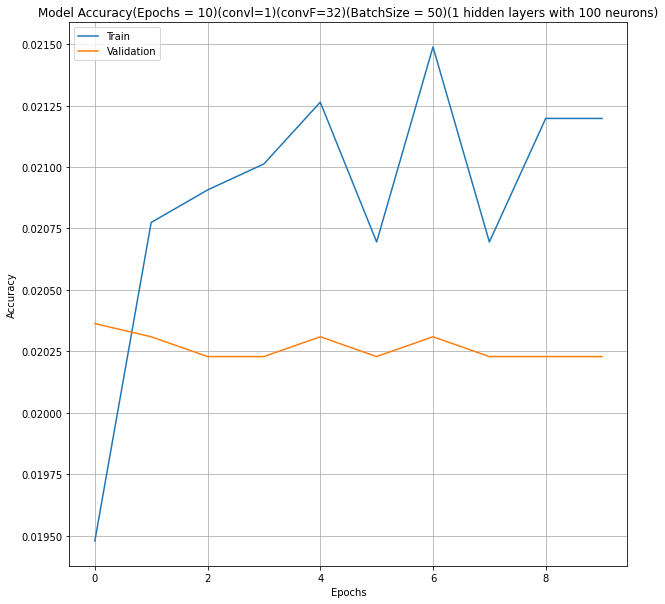

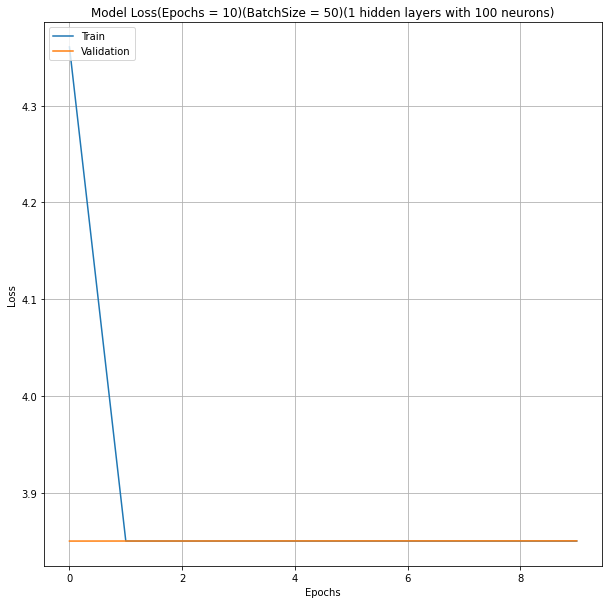

(18800, 28, 28, 1)


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2.127659574468085 %


In [ ]:
 
#epoch_range = np.array([10,20,50,100,150])
for b in batch_range:
#for e in epoch_range:
 # for bat in batch_range:
  Details = OneHiddenNN_Model.fit(X,dummy_y,validation_split=0.33, epochs=e, batch_size=b)
  #Details = OneHiddenNN_Model.fit(X,dummy_y,validation_split=0.33, epochs=e, batch_size=b)#, verbose=1)### both train images(pixels) and corresponding labels(1-hot) are in encoded form
  #estimator = KerasClassifier(build_fn=baseline_model, epochs=70, batch_size=5, verbose=0)
  #kfold = KFold(n_splits=10, shuffle=True)
  #results = cross_val_score(estimator, X, dummy_y, cv=kfold)
  #print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
 
  hist_df = pandas.DataFrame(Details.history)
  hist_csv_file = files_dir+'history_'+str(e)+'_'+str(b)+'_'+str(convl)+'_'+str(convF)+'_'+str(hl)+'_'+str(hln)+'.csv'
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)
 
  # summarize history for accuracy
  plt.figure(figsize=(10,10))
  plt.plot(Details.history['accuracy'])
  plt.plot(Details.history['val_accuracy'])
  title = 'Model Accuracy'+'(Epochs = '+str(e)+')'+'(convl='+str(convl)+')'+'(convF='+str(convF)+')'+'(BatchSize = '+str(b)+')('+str(hl)+' hidden layers with '+str(hln)+' neurons)'
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.grid()
  plt.legend(['Train', 'Validation'], loc='upper left')
  file_name = files_dir+'Acc_'+str(e)+'_'+str(b)+'_'+str(hl)+'_'+str(hln)
  plt.savefig(file_name)
  plt.show()
 
  # summarize history for loss
  plt.figure(figsize=(10,10))
  plt.plot(Details.history['loss'])
  plt.plot(Details.history['val_loss'])
  title = 'Model Loss'+'(Epochs = '+str(e)+')'+'(BatchSize = '+str(b)+')('+str(hl)+' hidden layers with '+str(hln)+' neurons)'
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.grid()
  plt.legend(['Train', 'Validation'], loc='upper left')
  file_name = files_dir+'Loss_'+str(e)+'_'+str(b)+'_'+str(hl)+'_'+str(hln)
  plt.savefig(file_name)
  plt.show()
 
  test_perf = []
  TestImage =TestImageSet[:,0:784]
  ##TestImage = np.asarray(TestImage).astype('float32')
  print(TestImage.shape)
  y_pred = OneHiddenNN_Model.predict_classes(TestImage)
  test_accuracy = (18800 - np.count_nonzero(TestImageSet[:,784]-y_pred))*100/18800
  test_perf.append(test_accuracy)
  print(test_accuracy,'%')